# Interactive Integration of the MCO
## For the Mechanical Chaotic Oscillator
```
Michael Huster
Duquesne University
profhuster@gmail.com
2019-07-10
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline

# MCO - Mechanical Chaotic Oscillator
## Numerical Integration

The Newton's Second Law equation of motion are

$$
\omega_{\phi} = \dot{\phi}
$$

and

$$
\dot{\omega}_{\phi} = -\frac{\mu}{I}\left [ B_{field} \sin \phi + 
B_{drive} \cos \phi \sin \omega_d t \right ] - \frac{\beta 
\omega_{\phi}}{I}
$$

I define $\omega_0^2 = \frac{\mu B_{field}}{I}$, $b = \frac{B_{drive}}{B_{field}}$ and 
$\gamma = \frac{\beta}{I}$,
then the equation of the MCO can be written

$$
\dot{\omega}_{\phi} = -\omega_0^2 \left [
\sin \phi + b \cos \phi \sin \omega_d t \right ] 
- \gamma \omega_{\phi}
$$

# Global Integration Parameters

In [2]:
nPoints = 10000
DT = 0.1
DT2 = DT * DT
PHI0 = 1.01 * np.pi

# Globals
OMEGA_0 = 1.0
OMEGA_0_SQ = OMEGA_0**2
OMEGA_D = 0.9 * OMEGA_0
GAMMA = 0.001

# Euler-Cromer (Symplectic Euler)

In [3]:
def symEuler(i, y, t):
    # Update p
    y[1,i+1] = (y[1,i] - DT * OMEGA_0_SQ * (np.sin(y[0,i]) + b * np.cos(y[0,i]) * np.sin(OMEGA_D * t[i]))) / \
        (1.0 + GAMMA * DT)
    y[0,i+1] = y[0,i] + DT * y[1,i+1]

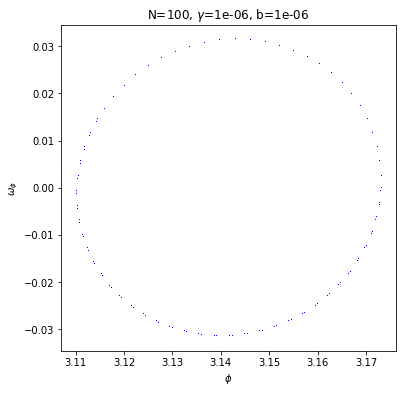

In [4]:
def modelMCO(nPoints=100, log10Gamma=-6.0, log10B=-6):
    GAMMA = 10.0**log10Gamma
    b = 10.0**log10B
    def symEuler(i, y, t):
        # Update p
        y[1,i+1] = (y[1,i] + DT * OMEGA_0_SQ * (np.sin(y[0,i]) + b * np.cos(y[0,i]) * np.sin(OMEGA_D * t[i]))) / \
            (1.0 + GAMMA * DT)
        y[0,i+1] = y[0,i] + DT * y[1,i+1]    # Initialize
    t = np.arange(0, nPoints * DT, DT)
    yinit = np.array([PHI0, 0.0])
    y = np.zeros((2,nPoints), dtype='float64')
    y[0,0] = yinit[0]
    y[0,1] = yinit[1]

    # Run
    for i in range(nPoints-1):
        symEuler(i, y, t)

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    ax.plot(y[0]%(2*np.pi), y[1], 'b,')
    ax.set_xlabel('$\phi$')
    ax.set_ylabel('$\omega_{\phi}$')
    ax.set_title("N={}, $\gamma$={}, b={}".format(nPoints, 10**log10Gamma, 10**log10B))
    plt.show()
    
modelMCO(100)

In [5]:
# From https://pundit.pratt.duke.edu/wiki/Python:Ordinary_Differential_Equations/Examples
def state_plotter(times, states, fig_num):
    num_states = np.shape(states)[0]
    num_cols = int(np.ceil(np.sqrt(num_states)))
    num_rows = int(np.ceil(num_states / num_cols))
    plt.figure(fig_num, figsize=(12,6))
    plt.clf()
    fig, ax = plt.subplots(num_rows, num_cols, num=fig_num, clear=True,
                         squeeze=False)
    for n in range(num_states):
        row = n // num_cols
        col = n % num_cols
        ax[row][col].plot(times, states[n], 'b,')
        ax[row][col].set(xlabel='Time',
                         ylabel='$y_{:0.0f}(t)$'.format(n),
                         title='$y_{:0.0f}(t)$ vs. Time'.format(n))
        
    for n in range(num_states, num_rows * num_cols):
        fig.delaxes(ax[n // num_cols][n % num_cols])

    fig.tight_layout()
    return fig

In [6]:
# Interactive call
interact(modelMCO, nPoints=(10,10000), log10Gamma=(-6,1), log10B=(-6,1));

interactive(children=(IntSlider(value=100, description='nPoints', max=10000, min=10), IntSlider(value=-6, desc…

In [ ]:
np.linspace(-6,1,8)

# Phase Plot

In [ ]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.plot(y[0], y[1], 'b,')
ax.set_xlabel('$\phi$')
ax.set_ylabel('$\omega_{\phi}$')
ax.set_title("Velocity Verlet")
fig.savefig("MCO_Int_SymEu2.png")

# Velocity Verlet Integration

In [ ]:
def velocityVerlet(i, y, t):
    accHalfHalf = 0.5 * OMEGA_0_SQ * (np.sin(y[0,i]) + b * np.cos(y[0,i]) * np.sin(OMEGA_D * t[i])) - GAMMA * y[1,i]
    y[0,i+1] = y[0,i] + y[1,i] * DT + accHalfHalf * DT2
    accFullHalf = 0.5 * OMEGA_0_SQ * (np.sin(y[0,i+1]) + b * np.cos(y[0,i+1]) * np.sin(OMEGA_D * t[i+1])) - \
      GAMMA * y[1,i]
    y[1,i+1] = y[1,i] + (accHalfHalf + accFullHalf) * DT

In [ ]:
%%time
# Initialize
t = np.arange(0, nPoints * DT, DT)
yinit = np.array([PHI0, 0.0])
y = np.zeros((2,nPoints), dtype='float64')
y[0,0] = yinit[0]
y[0,1] = yinit[1]

# Run
for i in range(nPoints-1):
    velocityVerlet(i, y, t)
# Plot
fig = state_plotter(t, y, 1)
fig.savefig("MCO_Int_VV1.png")

# Phase Plot

In [ ]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.plot(y[0], y[1], 'b,')
ax.set_xlabel('$\phi$')
ax.set_ylabel('$\omega_{\phi}$')
ax.set_title("Velocity Verlet")
fig.savefig("MCO_Int_VV2.png")

# Define ODE Derivative Function

In [ ]:
# %% Define derivative function

def f(t, y):
    # t = time
    # y[0] = phi
    # y[1] = omega
    global OMEGA_0_SQ, b, OMEGA_D, GAMMA
    phiDot = y[1]
    omegaDot = OMEGA_0_SQ * (np.sin(y[0]) + b * np.cos(y[0]) * np.sin(OMEGA_D * t)) - GAMMA * phiDot
    return np.array((phiDot, omegaDot))

# Initialize, Run, and Plot
## (Using the Default RK45 Method)

In [ ]:
%%time
# Initialize
t = np.arange(0, nPoints * DT, DT)
yinit = np.array([PHI0, 0.0])

# Run
sol = solve_ivp(lambda t, y: f(t, y), 
                [t[0], t[-1]], yinit, t_eval=t, method='RK45')

# Plot
fig = state_plotter(sol.t, sol.y, 1)
fig.savefig("MCO_Int_RK1.png")

In [ ]:
%%time
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.plot(sol.y[0]%(2*np.pi), sol.y[1], 'k,')
ax.set_xlabel('$\phi$')
ax.set_ylabel('$\omega_{\phi}$')
ax.set_title("Runge-Kutta45")
fig.savefig("MCO_Int_RK2.png")

# Initialize, Run, and Plot
## (Using the Radau Method)

In [ ]:
%%time
# Initialize
t = np.arange(0, nPoints * DT, DT)
yinit = np.array([PHI0, 0.0])

# Run
sol = solve_ivp(lambda t, y: f(t, y), 
                [t[0], t[-1]], yinit, t_eval=t, method='Radau')

# Plot
fig = state_plotter(sol.t, sol.y, 1)
fig.savefig("MCO_Int_Radau1.png")

In [ ]:
%%time
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.plot(sol.y[0], sol.y[1], 'k,')
ax.set_xlabel('$\phi$')
ax.set_ylabel('$\omega_{\phi}$')
ax.set_title("Radau")
fig.savefig("MCO_Int_Radau2.png")

In [ ]:
nPoints/64.0